### Kepler - Exoplanets Disposition Machine Learning Prediction

This dataset was produced from the NASA Exoplanet Archive  http://exoplanetarchive.ipac.caltech.edu

The target will be to predict koi_disposition which is an archive of confirmed, false positive, and candidate exoplanets in our galaxy.

In [2]:
# description of columns
# COLUMN kepid:          KepID
# COLUMN kepoi_name:     KOI Name
# COLUMN kepler_name:    Kepler Name
# COLUMN koi_disposition: Exoplanet Archive Disposition
# COLUMN koi_pdisposition: Disposition Using Kepler Data
# COLUMN koi_score:      Disposition Score
# COLUMN koi_fpflag_nt:  Not Transit-Like False Positive Flag
# COLUMN koi_fpflag_ss:  Stellar Eclipse False Positive Flag
# COLUMN koi_fpflag_co:  Centroid Offset False Positive Flag
# COLUMN koi_fpflag_ec:  Ephemeris Match Indicates Contamination False Positive Flag
# COLUMN koi_period:     Orbital Period [days]
# COLUMN koi_period_err1: Orbital Period Upper Unc. [days]
# COLUMN koi_period_err2: Orbital Period Lower Unc. [days]
# COLUMN koi_time0bk:    Transit Epoch [BKJD]
# COLUMN koi_time0bk_err1: Transit Epoch Upper Unc. [BKJD]
# COLUMN koi_time0bk_err2: Transit Epoch Lower Unc. [BKJD]
# COLUMN koi_impact:     Impact Parameter
# COLUMN koi_impact_err1: Impact Parameter Upper Unc.
# COLUMN koi_impact_err2: Impact Parameter Lower Unc.
# COLUMN koi_duration:   Transit Duration [hrs]
# COLUMN koi_duration_err1: Transit Duration Upper Unc. [hrs]
# COLUMN koi_duration_err2: Transit Duration Lower Unc. [hrs]
# COLUMN koi_depth:      Transit Depth [ppm]
# COLUMN koi_depth_err1: Transit Depth Upper Unc. [ppm]
# COLUMN koi_depth_err2: Transit Depth Lower Unc. [ppm]
# COLUMN koi_prad:       Planetary Radius [Earth radii]
# COLUMN koi_prad_err1:  Planetary Radius Upper Unc. [Earth radii]
# COLUMN koi_prad_err2:  Planetary Radius Lower Unc. [Earth radii]
# COLUMN koi_teq:        Equilibrium Temperature [K]
# COLUMN koi_teq_err1:   Equilibrium Temperature Upper Unc. [K]
# COLUMN koi_teq_err2:   Equilibrium Temperature Lower Unc. [K]
# COLUMN koi_insol:      Insolation Flux [Earth flux]
# COLUMN koi_insol_err1: Insolation Flux Upper Unc. [Earth flux]
# COLUMN koi_insol_err2: Insolation Flux Lower Unc. [Earth flux]
# COLUMN koi_model_snr:  Transit Signal-to-Noise
# COLUMN koi_tce_plnt_num: TCE Planet Number
# COLUMN koi_tce_delivname: TCE Delivery
# COLUMN koi_steff:      Stellar Effective Temperature [K]
# COLUMN koi_steff_err1: Stellar Effective Temperature Upper Unc. [K]
# COLUMN koi_steff_err2: Stellar Effective Temperature Lower Unc. [K]
# COLUMN koi_slogg:      Stellar Surface Gravity [log10(cm/s**2)]
# COLUMN koi_slogg_err1: Stellar Surface Gravity Upper Unc. [log10(cm/s**2)]
# COLUMN koi_slogg_err2: Stellar Surface Gravity Lower Unc. [log10(cm/s**2)]
# COLUMN koi_srad:       Stellar Radius [Solar radii]
# COLUMN koi_srad_err1:  Stellar Radius Upper Unc. [Solar radii]
# COLUMN koi_srad_err2:  Stellar Radius Lower Unc. [Solar radii]
# COLUMN ra:             RA [decimal degrees]
# COLUMN dec:            Dec [decimal degrees]
# COLUMN koi_kepmag:     Kepler-band [mag]


In [50]:
# imports

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LassoCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


## Data Collection and Exploration



In [338]:
df = pd.read_csv("cumulative_kepler.csv")

In [340]:
df # This is a big df but many columns can be dropped right away

,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,10090151,K07985.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,1,0,...,-166.0,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
9560,10128825,K07986.01,NaN,CANDIDATE,CANDIDATE,0.497,0,0,0,0,...,-220.0,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757
9561,10147276,K07987.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.021,0,0,1,0,...,-236.0,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385
9562,10155286,K07988.01,NaN,CANDIDATE,CANDIDATE,0.092,0,0,0,0,...,-128.0,2.992,0.030,-0.027,7.824,0.223,-1.896,296.76288,47.145142,10.998


In [342]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 49 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   kepid              9564 non-null   int64  
 1   kepoi_name         9564 non-null   object 
 2   kepler_name        2747 non-null   object 
 3   koi_disposition    9564 non-null   object 
 4   koi_pdisposition   9564 non-null   object 
 5   koi_score          8054 non-null   float64
 6   koi_fpflag_nt      9564 non-null   int64  
 7   koi_fpflag_ss      9564 non-null   int64  
 8   koi_fpflag_co      9564 non-null   int64  
 9   koi_fpflag_ec      9564 non-null   int64  
 10  koi_period         9564 non-null   float64
 11  koi_period_err1    9110 non-null   float64
 12  koi_period_err2    9110 non-null   float64
 13  koi_time0bk        9564 non-null   float64
 14  koi_time0bk_err1   9110 non-null   float64
 15  koi_time0bk_err2   9110 non-null   float64
 16  koi_impact         9201 

In [344]:
df.isnull().sum()

kepid                   0
kepoi_name              0
kepler_name          6817
koi_disposition         0
koi_pdisposition        0
koi_score            1510
koi_fpflag_nt           0
koi_fpflag_ss           0
koi_fpflag_co           0
koi_fpflag_ec           0
koi_period              0
koi_period_err1       454
koi_period_err2       454
koi_time0bk             0
koi_time0bk_err1      454
koi_time0bk_err2      454
koi_impact            363
koi_impact_err1       454
koi_impact_err2       454
koi_duration            0
koi_duration_err1     454
koi_duration_err2     454
koi_depth             363
koi_depth_err1        454
koi_depth_err2        454
koi_prad              363
koi_prad_err1         363
koi_prad_err2         363
koi_teq               363
koi_teq_err1         9564
koi_teq_err2         9564
koi_insol             321
koi_insol_err1        321
koi_insol_err2        321
koi_model_snr         363
koi_tce_plnt_num      346
koi_tce_delivname     346
koi_steff             363
koi_steff_er

## Data Cleaning and Visualization

In [347]:
# Lets begin by dropping those columns that don't matter
cols_to_drop = [
    'kepid', # just an identifier
    'kepoi_name', #another identifier
    'kepler_name', # confirmed name
    'koi_teq_err1', # empty
    'koi_teq_err2', # empty
    'koi_tce_delivname' #identifier
]

df = df.drop(columns=cols_to_drop) 


In [349]:
# I don't think we can assume the nan koi_score are 0 so we'll have to drop them along with the rest of the missing values
df = df.dropna()

In [351]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7803 entries, 0 to 9563
Data columns (total 43 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   koi_disposition    7803 non-null   object 
 1   koi_pdisposition   7803 non-null   object 
 2   koi_score          7803 non-null   float64
 3   koi_fpflag_nt      7803 non-null   int64  
 4   koi_fpflag_ss      7803 non-null   int64  
 5   koi_fpflag_co      7803 non-null   int64  
 6   koi_fpflag_ec      7803 non-null   int64  
 7   koi_period         7803 non-null   float64
 8   koi_period_err1    7803 non-null   float64
 9   koi_period_err2    7803 non-null   float64
 10  koi_time0bk        7803 non-null   float64
 11  koi_time0bk_err1   7803 non-null   float64
 12  koi_time0bk_err2   7803 non-null   float64
 13  koi_impact         7803 non-null   float64
 14  koi_impact_err1    7803 non-null   float64
 15  koi_impact_err2    7803 non-null   float64
 16  koi_duration       7803 non-n

In [353]:
print(df['koi_disposition'].value_counts())


koi_disposition
FALSE POSITIVE    3735
CONFIRMED         2711
CANDIDATE         1357
Name: count, dtype: int64


In [355]:
print(df['koi_pdisposition'].value_counts())


koi_pdisposition
CANDIDATE         4062
FALSE POSITIVE    3741
Name: count, dtype: int64


In [357]:
# exploring some columns
df['koi_kepmag'].value_counts()

koi_kepmag
15.855    14
13.749    14
14.985    13
15.596    12
15.673    12
          ..
14.048     1
12.877     1
14.841     1
15.170     1
10.998     1
Name: count, Length: 3455, dtype: int64

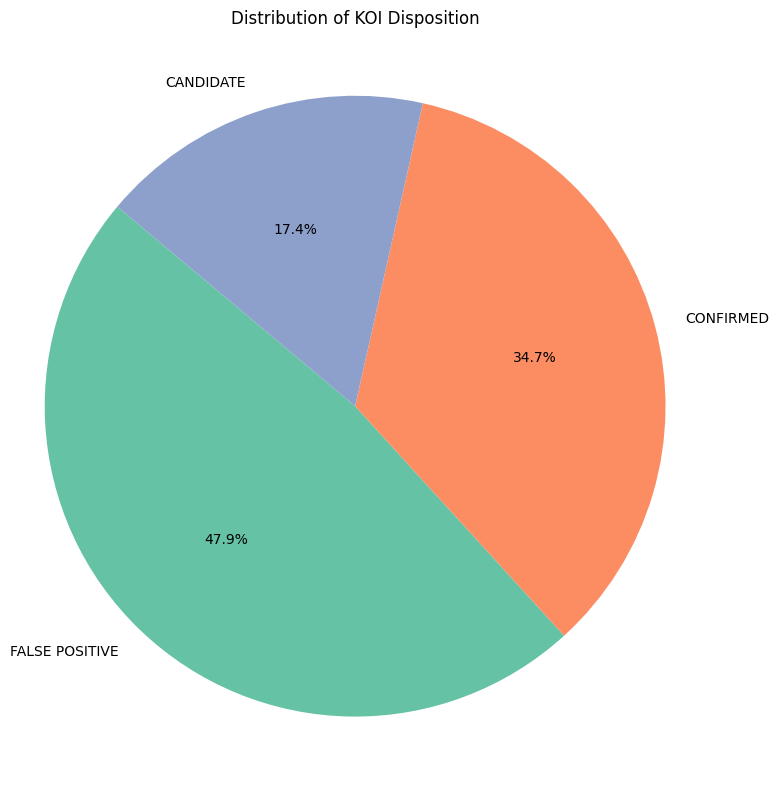

In [360]:
# Distribution of KOI Exoplanet labels
disposition_counts = df['koi_disposition'].value_counts()

# Plot
plt.figure(figsize=(8, 8))
plt.pie(
    disposition_counts, 
    labels=disposition_counts.index,
    autopct='%1.1f%%', 
    colors=['#66c2a5', '#fc8d62', '#8da0cb'],
    startangle=140,
)
plt.title('Distribution of KOI Disposition')
plt.axis('equal') 
plt.tight_layout()
plt.show()

## Feature-Engineering

In [141]:
# Encoding the two categorical features
# use labelencoder for both  
le_target = LabelEncoder()
df['koi_disposition'] = le_target.fit_transform(df['koi_disposition'].astype(str))


In [143]:
le_p = LabelEncoder()
df['koi_pdisposition'] = le_p.fit_transform(df['koi_pdisposition'])


In [145]:
df.sample(5)

,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
6291,2,1,0.000,0,1,0,0,420.929204,0.000086,-0.000086,...,-211.0,4.319,0.105,-0.195,1.197,0.357,-0.192,290.93896,38.119572,13.858
4151,1,0,0.996,0,0,0,0,0.849907,0.000004,-0.000004,...,-140.0,4.733,0.066,-0.033,0.505,0.039,-0.054,293.28802,43.514992,15.220
276,1,0,1.000,0,0,0,0,3.314947,0.000002,-0.000002,...,-166.0,4.481,0.062,-0.188,0.944,0.266,-0.089,293.45483,44.792789,15.142
1764,1,0,1.000,0,0,0,0,3.170597,0.000010,-0.000010,...,-81.0,4.563,0.011,-0.088,0.843,0.086,-0.033,285.89923,48.307301,15.353
9436,2,1,0.000,0,1,0,0,1.073832,0.000016,-0.000016,...,-336.0,3.789,0.399,-0.070,2.859,0.311,-1.244,292.64063,46.388039,14.902


In [147]:
correlation = df.corr()

correlation

,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
koi_disposition,1.000000,0.889439,-0.757596,0.012830,0.551985,0.490658,0.364830,-0.040911,0.000360,-0.000360,...,-0.248634,-0.114646,0.114085,-0.155755,0.058971,0.096922,-0.071220,0.126565,-0.066252,-0.059688
koi_pdisposition,0.889439,1.000000,-0.908955,0.008761,0.620948,0.550164,0.409076,0.009409,0.050352,-0.050352,...,-0.341288,-0.162990,0.163615,-0.235683,0.080934,0.129873,-0.094451,0.167133,-0.092639,-0.059246
koi_score,-0.757596,-0.908955,1.000000,-0.005638,-0.564956,-0.517586,-0.404564,-0.075041,-0.094397,0.094397,...,0.333482,0.152163,-0.164208,0.227586,-0.073932,-0.116433,0.082708,-0.167913,0.092400,0.051773
koi_fpflag_nt,0.012830,0.008761,-0.005638,1.000000,-0.017818,-0.000797,0.003808,0.013037,0.014556,-0.014556,...,-0.008440,-0.000291,-0.002237,0.000546,0.000372,0.000779,-0.001338,0.014813,0.011881,0.000024
koi_fpflag_ss,0.551985,0.620948,-0.564956,-0.017818,1.000000,0.130781,0.072654,-0.089415,-0.099338,0.099338,...,-0.214432,-0.109177,0.138631,-0.158620,0.064049,0.091204,-0.067559,0.089394,-0.046168,-0.046054
koi_fpflag_co,0.490658,0.550164,-0.517586,-0.000797,0.130781,1.000000,0.546453,-0.136381,-0.052910,0.052910,...,-0.135349,-0.031559,-0.005063,-0.130853,0.038866,0.049985,-0.025419,0.167689,-0.103263,0.056696
koi_fpflag_ec,0.364830,0.409076,-0.404564,0.003808,0.072654,0.546453,1.000000,-0.114852,-0.051742,0.051742,...,-0.095374,-0.005335,-0.012942,-0.096108,0.026161,0.040045,-0.017694,0.073353,-0.044414,0.039307
koi_period,-0.040911,0.009409,-0.075041,0.013037,-0.089415,-0.136381,-0.114852,1.000000,0.615839,-0.615839,...,0.002149,-0.050179,0.014662,-0.009083,0.017817,-0.000191,-0.007542,-0.041113,0.021024,-0.027582
koi_period_err1,0.000360,0.050352,-0.094397,0.014556,-0.099338,-0.052910,-0.051742,0.615839,1.000000,-1.000000,...,-0.034245,-0.020256,0.019269,-0.038286,0.022111,0.010081,-0.012800,-0.025464,0.021747,-0.027161
koi_period_err2,-0.000360,-0.050352,0.094397,-0.014556,0.099338,0.052910,0.051742,-0.615839,-1.000000,1.000000,...,0.034245,0.020256,-0.019269,0.038286,-0.022111,-0.010081,0.012800,0.025464,-0.021747,0.027161


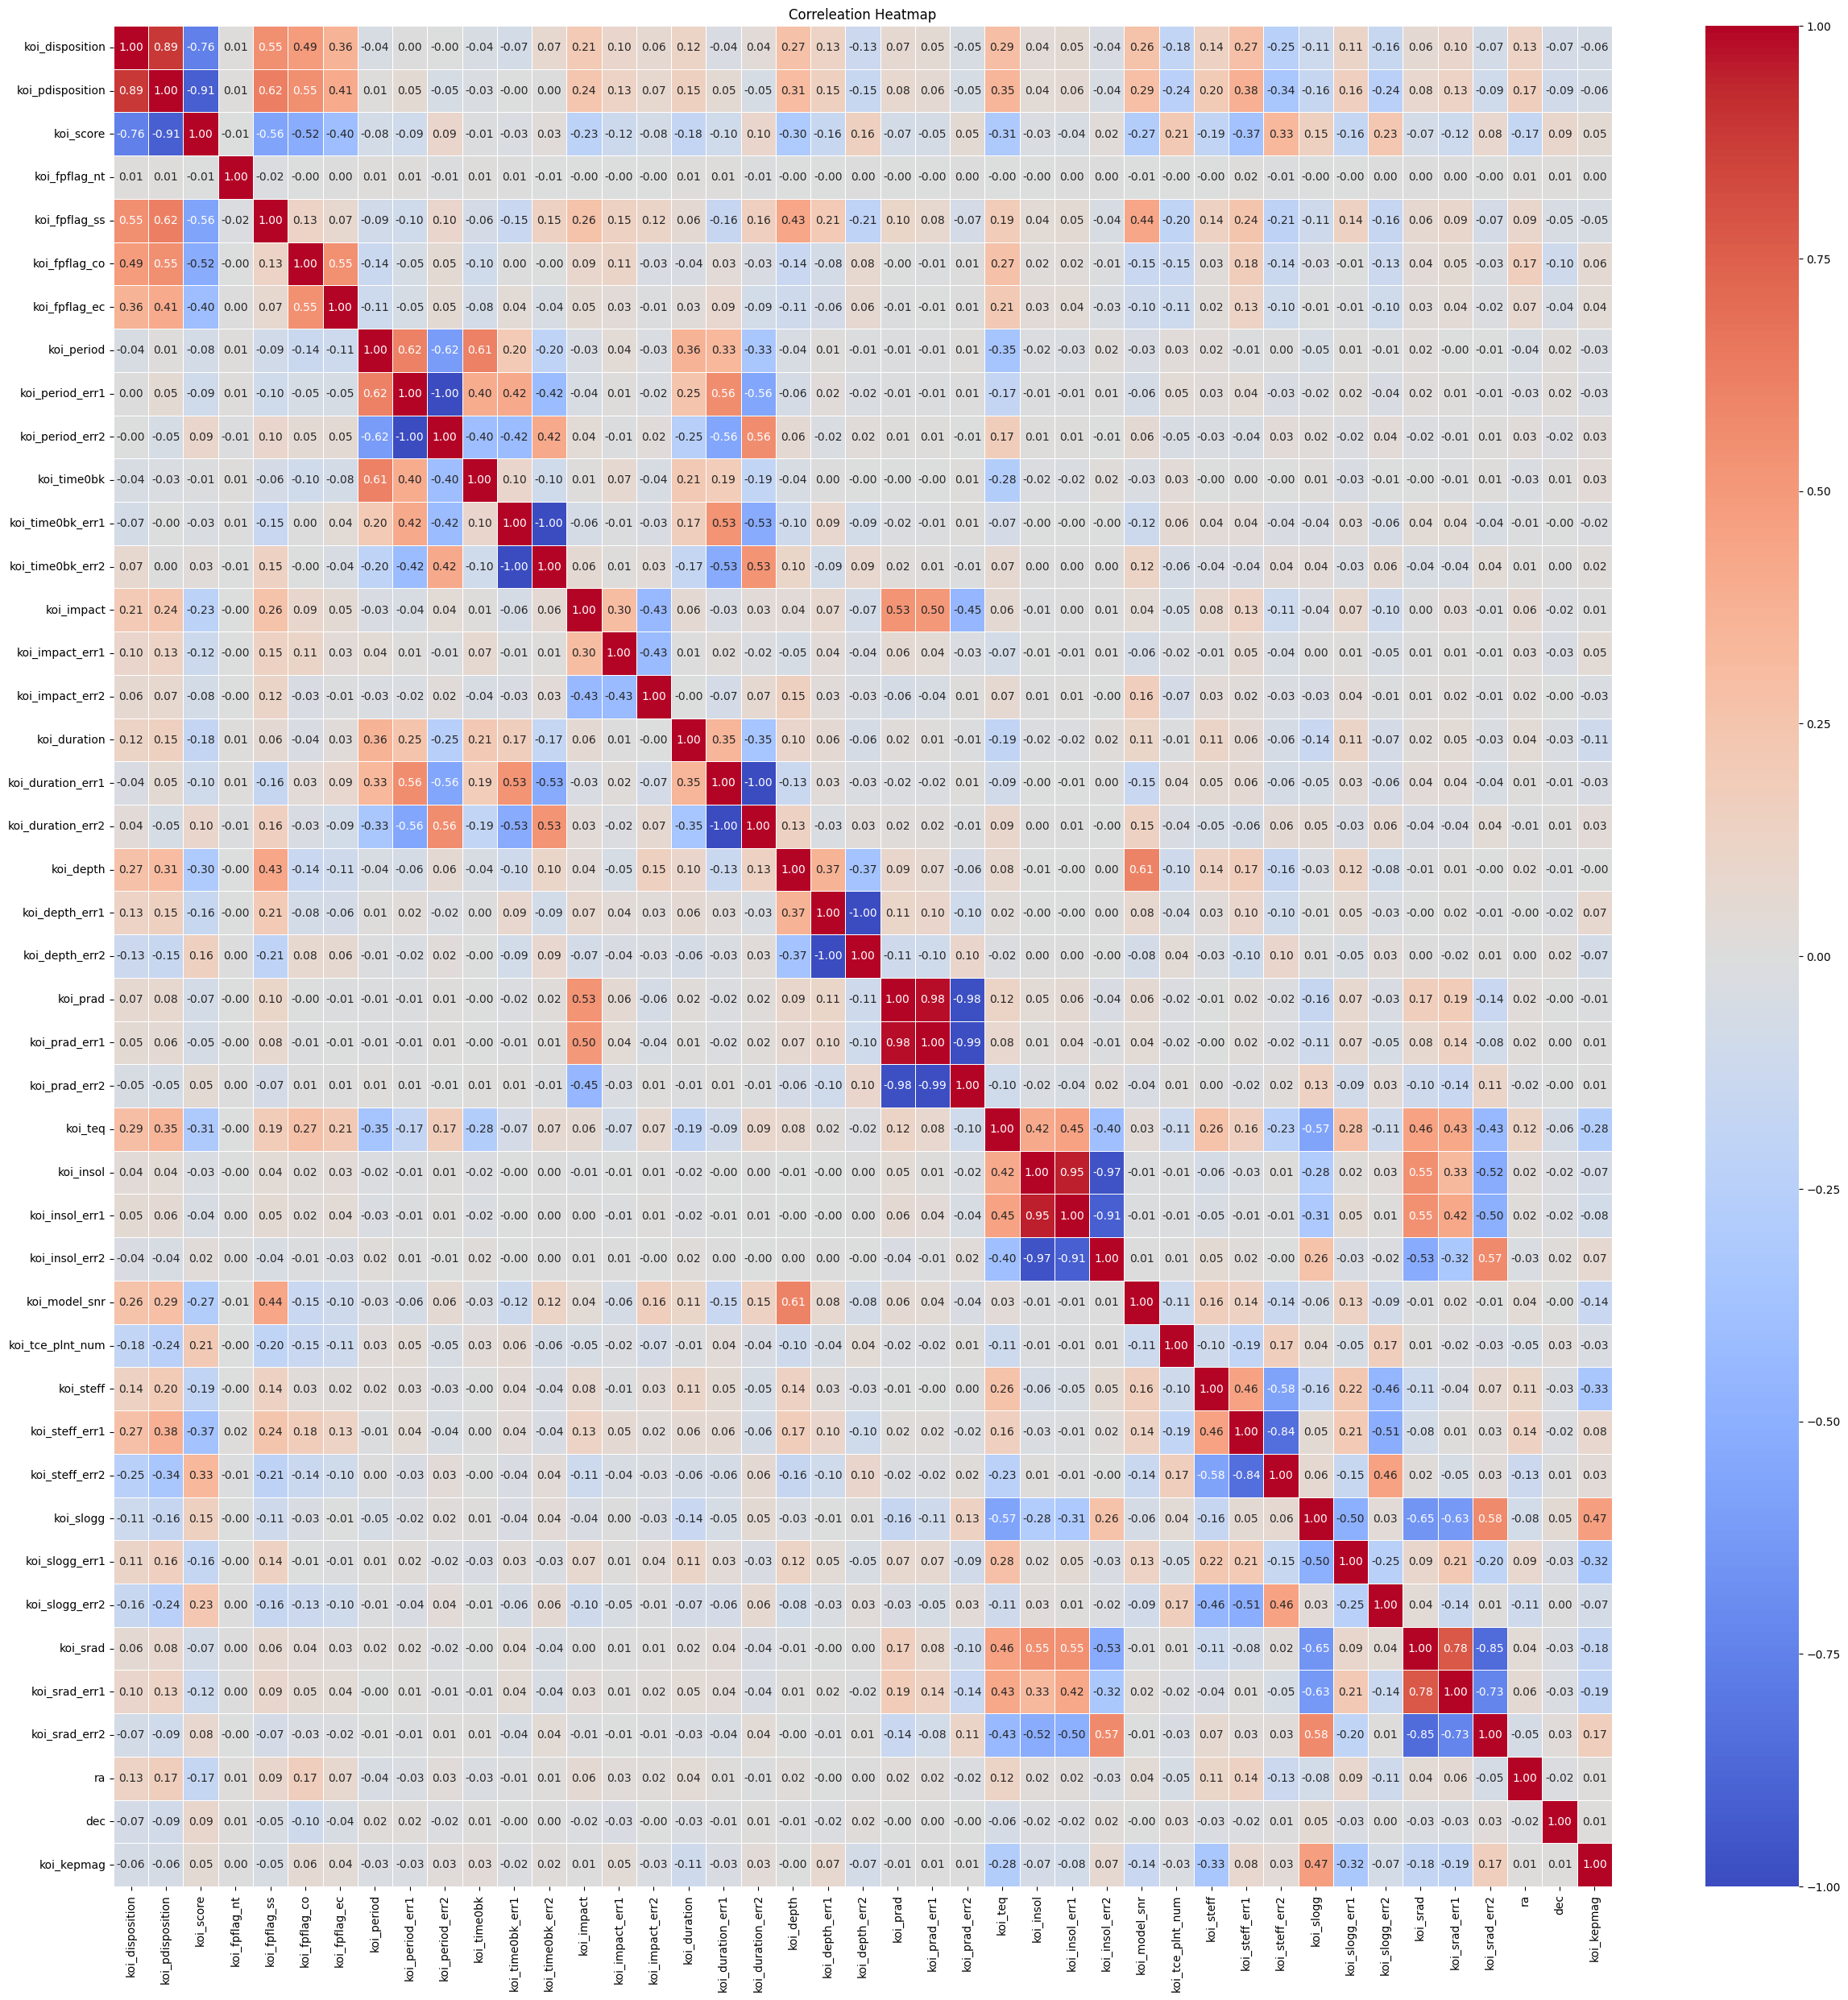

In [149]:
corr_matrix = df.corr()

plt.figure(figsize=(30, 30))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correleation Heatmap")
plt.show()


In [151]:
#Find the top correlations to koi_disposition

correlation = df.corr(numeric_only=True)  # Ensure only numeric columns
top_corr = correlation['koi_disposition'].drop('koi_disposition').abs().sort_values(ascending=False).head(15)
print(top_corr)


koi_pdisposition    0.889439
koi_score           0.757596
koi_fpflag_ss       0.551985
koi_fpflag_co       0.490658
koi_fpflag_ec       0.364830
koi_teq             0.293185
koi_steff_err1      0.274366
koi_depth           0.272861
koi_model_snr       0.261396
koi_steff_err2      0.248634
koi_impact          0.205762
koi_tce_plnt_num    0.180963
koi_slogg_err2      0.155755
koi_steff           0.141948
koi_depth_err2      0.129061
Name: koi_disposition, dtype: float64


## Models

### Random Forest Classification Model

In [275]:
# Seperate X and y
X = df.drop(['koi_disposition'],axis=1)
y = df['koi_disposition']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42) # This allows for it to be reporduced  


# Scalar Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [277]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=200)

In [279]:
# Fit  model
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=200)

In [280]:
from sklearn.metrics import confusion_matrix

y_pred = rfc.predict(X_test)
rfc_cm = confusion_matrix(y_test, y_pred)

print(rfc_cm)

[[219  67   0]
 [ 46 490   3]
 [  0   0 736]]


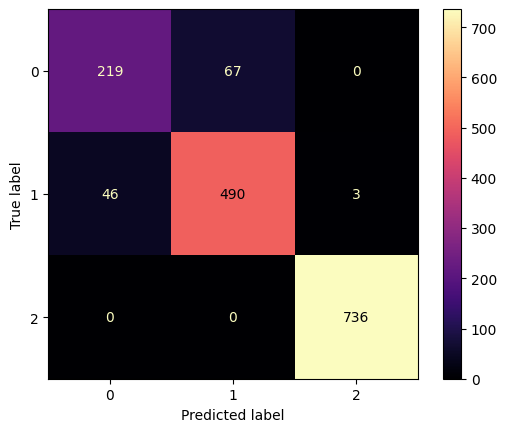

In [281]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(rfc_cm, display_labels=rfc.classes_)
disp.plot(cmap="magma")
plt.show()

In [285]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
#good results from this model

              precision    recall  f1-score   support

           0       0.83      0.77      0.79       286
           1       0.88      0.91      0.89       539
           2       1.00      1.00      1.00       736

    accuracy                           0.93      1561
   macro avg       0.90      0.89      0.90      1561
weighted avg       0.92      0.93      0.92      1561



In [287]:
feature_scores = pd.Series(rfc.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print(feature_scores)

koi_pdisposition     0.246723
koi_score            0.169367
koi_model_snr        0.060719
koi_prad             0.039336
koi_fpflag_co        0.037762
koi_fpflag_ss        0.037409
koi_prad_err2        0.027451
koi_duration_err2    0.024866
koi_duration_err1    0.024140
koi_prad_err1        0.023895
koi_time0bk_err1     0.022461
koi_steff_err1       0.019569
koi_time0bk_err2     0.016597
koi_steff_err2       0.016453
koi_depth            0.014435
koi_duration         0.014038
koi_insol_err1       0.013759
koi_insol_err2       0.012913
koi_impact           0.012815
koi_fpflag_ec        0.012354
koi_period           0.011253
koi_fpflag_nt        0.010868
koi_insol            0.009503
koi_teq              0.009324
koi_period_err2      0.008599
koi_depth_err1       0.008498
koi_depth_err2       0.008479
koi_time0bk          0.007731
koi_kepmag           0.007087
koi_period_err1      0.006812
ra                   0.006523
koi_impact_err2      0.006465
koi_slogg_err2       0.005918
koi_impact

C:\Users\Jon\AppData\Local\Temp\ipykernel_26044\3690518137.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_scores.values, y=feature_scores.index, palette="magma")


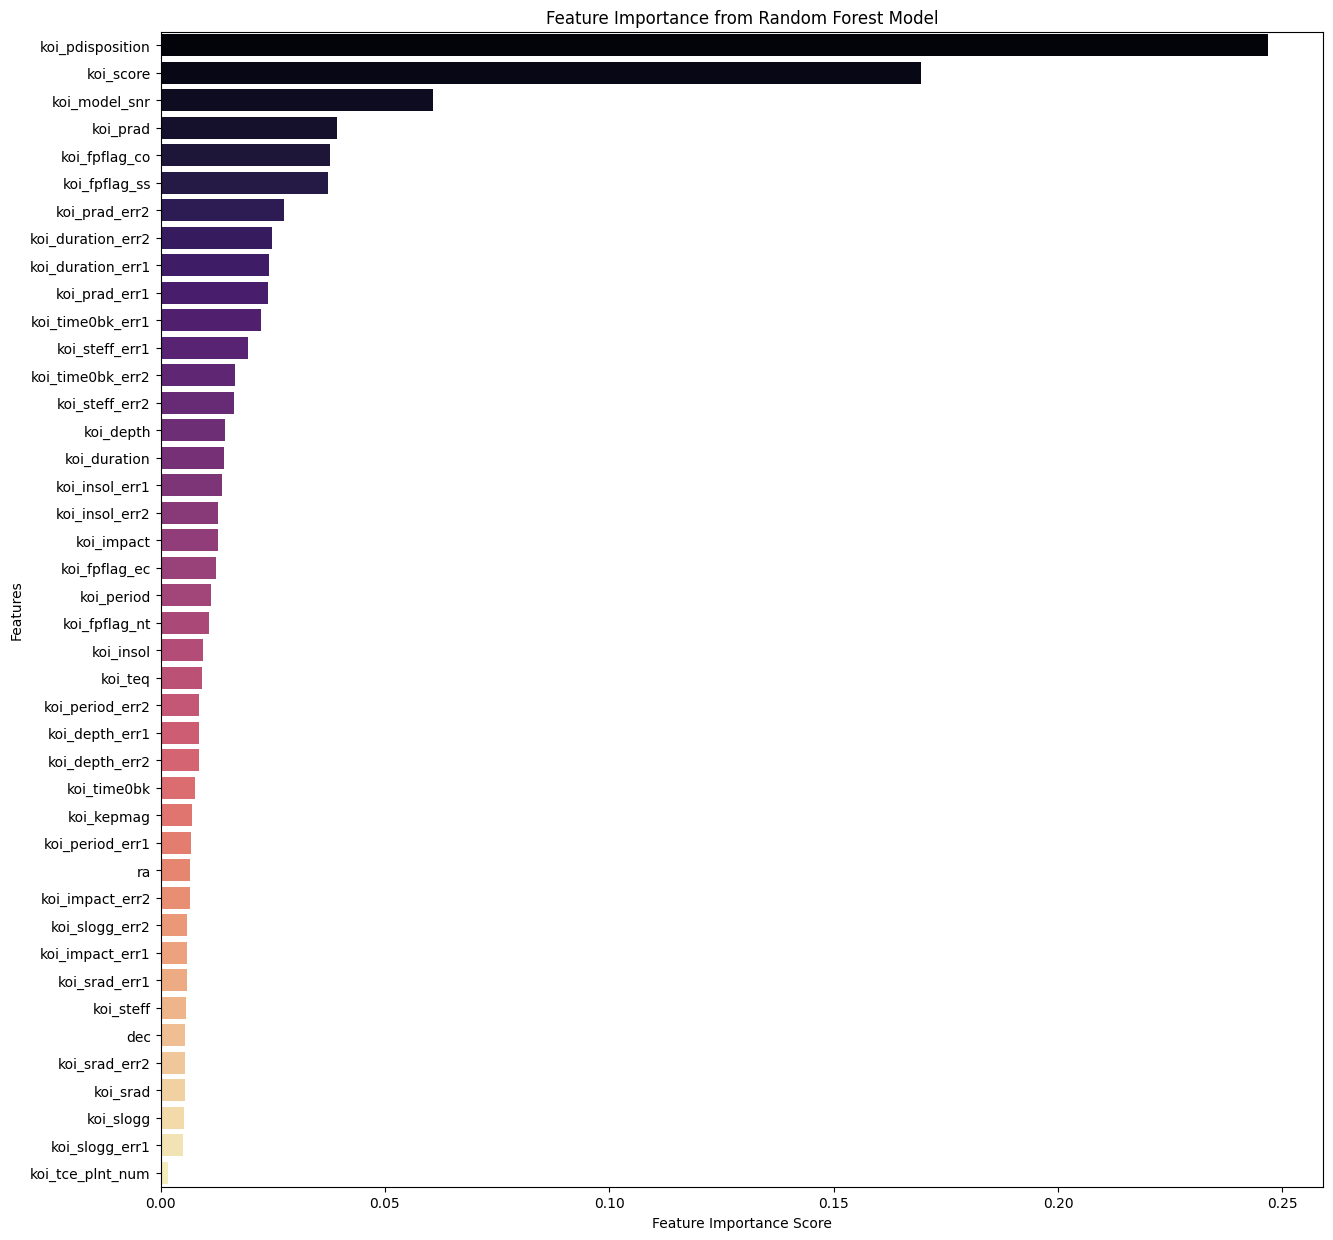

In [295]:
# Sorting feature importance values
plt.figure(figsize=(15, 15))
sns.barplot(x=feature_scores.values, y=feature_scores.index, palette="magma")

# Plot for easy visuals
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance from Random Forest Model")
plt.show()

### SMV Model

In [33]:
from sklearn.svm import SVC # Supprt Vector Classifier
from sklearn.model_selection import GridSearchCV

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [69]:
svm_model = SVC(kernel='linear', C=1, gamma='scale')  #change kernel to 'linear', 'poly', etc.
svm_model.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [70]:
y_pred = svm_model.predict(X_test)

In [71]:
# Evaluate Model
accuracy = accuracy_score(y_test, y_pred)
cm       = confusion_matrix(y_test, y_pred)

print("Model Accuracy: ", accuracy)
print("Confusion Matrix: ")
print(cm)

Model Accuracy:  0.8680333119795003
Confusion Matrix: 
[[131 135  20]
 [ 25 499  15]
 [ 10   1 725]]


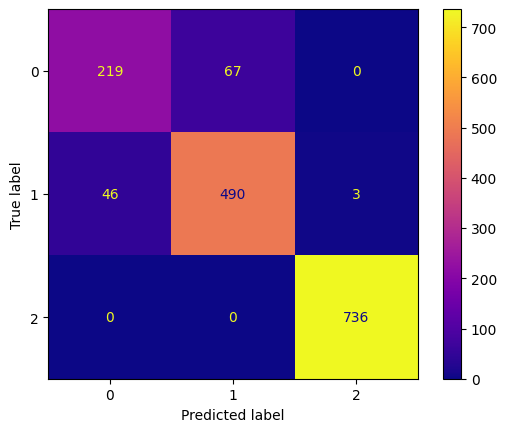

In [84]:
disp = ConfusionMatrixDisplay(rfc_cm, display_labels=rfc.classes_)
disp.plot(cmap="plasma")
plt.show()

In [73]:
report = classification_report(y_test, y_pred)
print(report)
# Worse than the RandomForest but the parameters change the results quite a bit.

              precision    recall  f1-score   support

           0       0.79      0.46      0.58       286
           1       0.79      0.93      0.85       539
           2       0.95      0.99      0.97       736

    accuracy                           0.87      1561
   macro avg       0.84      0.79      0.80      1561
weighted avg       0.87      0.87      0.86      1561



### Try Random Forest Classification Model with selected features
Try out a model that only includes relevant features. I will also drop koi_pdisposition because its another culmination of the df columns so there is too much influence and doesn’t really reflect a real world scenario.

In [547]:
print(top_corr) # arbitrarily chose the the features with corrolation to koi_disposition over 20%

koi_pdisposition    0.889439
koi_score           0.757596
koi_fpflag_ss       0.551985
koi_fpflag_co       0.490658
koi_fpflag_ec       0.364830
koi_teq             0.293185
koi_steff_err1      0.274366
koi_depth           0.272861
koi_model_snr       0.261396
koi_steff_err2      0.248634
koi_impact          0.205762
koi_tce_plnt_num    0.180963
koi_slogg_err2      0.155755
koi_steff           0.141948
koi_depth_err2      0.129061
Name: koi_disposition, dtype: float64


In [549]:
columns_to_keep = [ "koi_disposition",
    'koi_score', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec',
    'koi_teq', 'koi_steff_err1', 'koi_depth', 'koi_model_snr',
    'koi_steff_err2', 'koi_impact', 'koi_tce_plnt_num'
]

df_features = df[columns_to_keep]

In [551]:
df_features

,koi_disposition,koi_score,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_teq,koi_steff_err1,koi_depth,koi_model_snr,koi_steff_err2,koi_impact,koi_tce_plnt_num
0,CONFIRMED,1.000,0,0,0,793.0,81.0,616.0,35.8,-81.0,0.146,1.0
1,CONFIRMED,0.969,0,0,0,443.0,81.0,875.0,25.8,-81.0,0.586,2.0
2,CANDIDATE,0.000,0,0,0,638.0,158.0,10800.0,76.3,-176.0,0.969,1.0
3,FALSE POSITIVE,0.000,1,0,0,1395.0,157.0,8080.0,505.6,-174.0,1.276,1.0
4,CONFIRMED,1.000,0,0,0,1406.0,169.0,603.0,40.9,-211.0,0.701,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9559,FALSE POSITIVE,0.000,1,1,0,2088.0,139.0,1580.0,453.3,-166.0,1.252,1.0
9560,CANDIDATE,0.497,0,0,0,1608.0,165.0,48.5,10.6,-220.0,0.043,1.0
9561,FALSE POSITIVE,0.021,0,1,0,2218.0,193.0,104.0,12.3,-236.0,0.147,1.0
9562,CANDIDATE,0.092,0,0,0,557.0,39.0,639.0,14.0,-128.0,0.214,1.0


In [553]:
# Seperate X and y
X = df_features.drop(['koi_disposition'],axis=1)
y = df_features['koi_disposition']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Scalar Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [555]:
rfc_features = RandomForestClassifier(random_state=200)

In [557]:
# Fit  model
rfc_features.fit(X_train, y_train)

RandomForestClassifier(random_state=200)

In [558]:
y_pred = rfc_features.predict(X_test)
rfc_features_cm = confusion_matrix(y_test, y_pred)

print(rfc_features_cm)

[[186  74  26]
 [ 42 489   8]
 [ 11   1 724]]


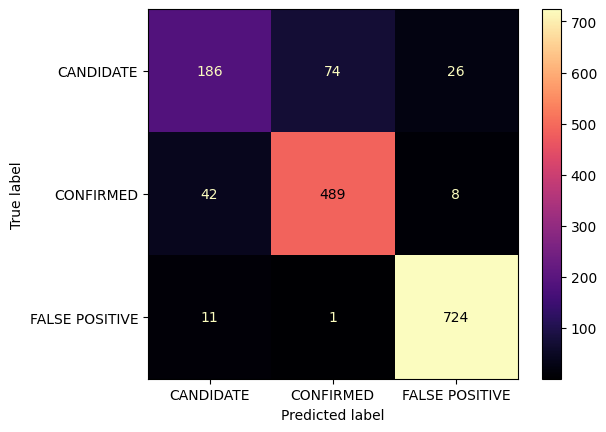

In [561]:
disp = ConfusionMatrixDisplay(rfc_features_cm, display_labels=rfc_features.classes_)
disp.plot(cmap="magma")
plt.show()

In [606]:
print(classification_report(y_test, y_pred))
# Not quite as good as the RFC without feature removal but I believe this is is a better representation of the data

                precision    recall  f1-score   support

     CANDIDATE       0.78      0.65      0.71       286
     CONFIRMED       0.87      0.91      0.89       539
FALSE POSITIVE       0.96      0.98      0.97       736

      accuracy                           0.90      1561
     macro avg       0.87      0.85      0.85      1561
  weighted avg       0.89      0.90      0.89      1561



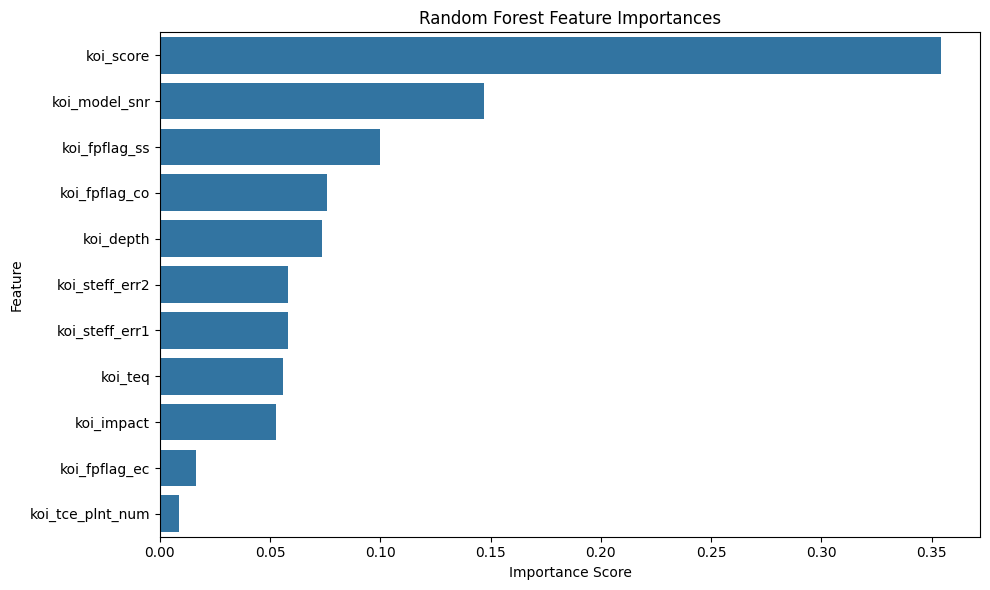

In [565]:
# Feature names in the same order as your training data
feature_names = [
    'koi_score',
    'koi_fpflag_ss',
    'koi_fpflag_co',
    'koi_fpflag_ec',
    'koi_teq',
    'koi_steff_err1',
    'koi_depth',
    'koi_model_snr',
    'koi_steff_err2',
    'koi_impact',
    'koi_tce_plnt_num'
]

importances = rfc_features.feature_importances_

# Create a DataFrame for plotting
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df,)
plt.title('Random Forest Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

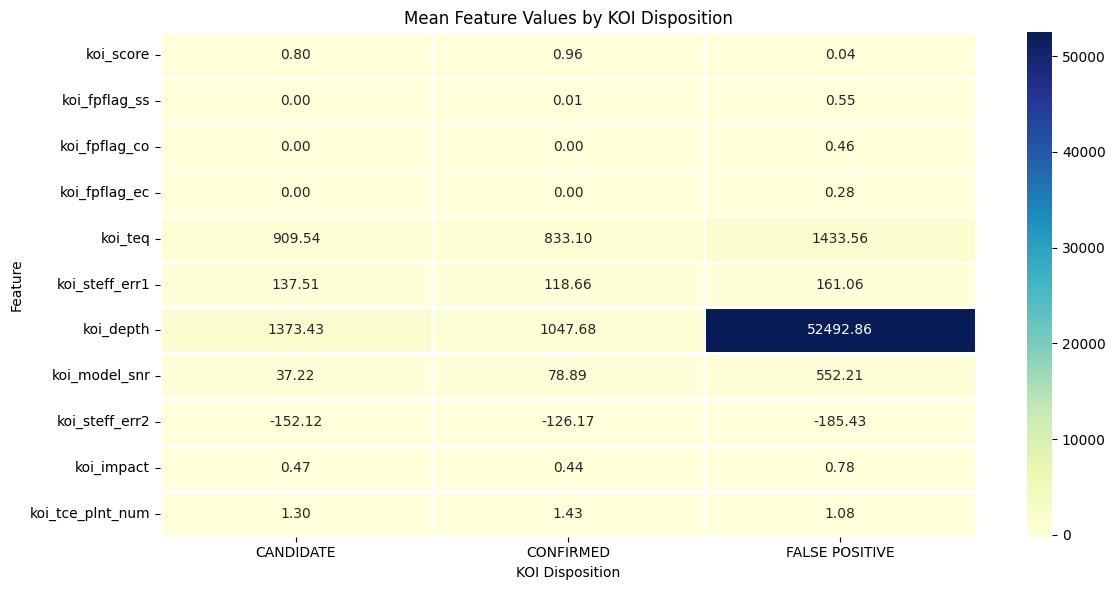

In [610]:
# Visualize the mean values of the features per category
mean_values = df.groupby('koi_disposition')[feature_names].mean()

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(mean_values.T, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=1)
plt.title("Mean Feature Values by KOI Disposition")
plt.xlabel("KOI Disposition")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

## Predictions
Using sample data to test the selected model

In [587]:
# Example input1 
sample_input1 = pd.DataFrame([{
    'koi_score': 0.9,
    'koi_fpflag_ss': 0,
    'koi_fpflag_co': 0,
    'koi_fpflag_ec': 0,
    'koi_teq': 500,
    'koi_steff_err1': 100,
    'koi_depth': 200,
    'koi_model_snr': 15,
    'koi_steff_err2': -90,
    'koi_impact': 0.3,
    'koi_tce_plnt_num': 1
}])

In [574]:
y_sample_pred1 = rfc_features.predict(sample_input1)
print("Predicted class:", y_sample_pred1[0])

Predicted class: CONFIRMED


In [597]:
# Example input2
sample_input2 = pd.DataFrame([{
    'koi_score': 0.4,
    'koi_fpflag_ss': 0,
    'koi_fpflag_co': 1,
    'koi_fpflag_ec': 0,
    'koi_teq': 700,
    'koi_steff_err1': 115,
    'koi_depth': 1000,
    'koi_model_snr': 75,
    'koi_steff_err2': -100,
    'koi_impact': 0.5,
    'koi_tce_plnt_num': 1.5
}])

In [599]:
y_sample_pred2 = rfc_features.predict(sample_input2)
print("Predicted class:", y_sample_pred2[0])

Predicted class: FALSE POSITIVE


These predictions seem to be in line with the data from the model